In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

**CHECKING VALIDITY OF FILES**

In [2]:
'''''
def validate_image_file(file_path):
    """
    Validate if a file can be processed by TensorFlow's image pipeline.
    Returns True if the file is valid, False otherwise.
    """
    try:
        img = tf.io.read_file(file_path)
        img = tf.image.decode_image(img, channels=3)
        img = tf.image.resize(img, [224, 224])
        return True
    except:
        return False

def filter_valid_files(directory, extensions=(".jpg", ".jpeg", ".png", ".bmp", ".tiff")):
    """
    Traverse a directory and return a list of valid image file paths.
    """
    valid_files = []
    invalid_files = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(extensions):
                file_path = os.path.join(root, file)
                if validate_image_file(file_path):
                    valid_files.append(file_path)
                else:
                    invalid_files.append(file_path)

    print(f"Found {len(invalid_files)} invalid files.")
    for file in invalid_files:
        print(file)
    return valid_files
'''''

'\'\'\ndef validate_image_file(file_path):\n    """\n    Validate if a file can be processed by TensorFlow\'s image pipeline.\n    Returns True if the file is valid, False otherwise.\n    """\n    try:\n        img = tf.io.read_file(file_path)\n        img = tf.image.decode_image(img, channels=3)\n        img = tf.image.resize(img, [224, 224])\n        return True\n    except:\n        return False\n\ndef filter_valid_files(directory, extensions=(".jpg", ".jpeg", ".png", ".bmp", ".tiff")):\n    """\n    Traverse a directory and return a list of valid image file paths.\n    """\n    valid_files = []\n    invalid_files = []\n    for root, _, files in os.walk(directory):\n        for file in files:\n            if file.lower().endswith(extensions):\n                file_path = os.path.join(root, file)\n                if validate_image_file(file_path):\n                    valid_files.append(file_path)\n                else:\n                    invalid_files.append(file_path)\n\n    prin

**defining some globals with the paths to the training and test folders**

In [3]:
TRAINING_DIR = r'C:\Users\Timmothy Farrel\Documents\Berkas Bangkit\Bangkit\Capstone\Train'
VALIDATION_DIR = r'C:\Users\Timmothy Farrel\Documents\Berkas Bangkit\Bangkit\Capstone\Validation'

In [4]:
'''''
training_files = filter_valid_files(TRAINING_DIR)
validation_files = filter_valid_files(VALIDATION_DIR)
'''''

"''\ntraining_files = filter_valid_files(TRAINING_DIR)\nvalidation_files = filter_valid_files(VALIDATION_DIR)\n"

**COUNTING NUM OF TRAIN ADN VAL SETS**

In [5]:
ROOT_DIR = [TRAINING_DIR, VALIDATION_DIR]
for dir in ROOT_DIR:
    image_count = 0
    for dirname, _, subdirname in os.walk(f"{dir}"):
        image_count += len(subdirname)
    print(f"Total number of images in {os.path.basename(dir)} and its subdirectories: {image_count}")

Total number of images in Train and its subdirectories: 15415
Total number of images in Validation and its subdirectories: 3165


*EXAMPLE OF DATA*

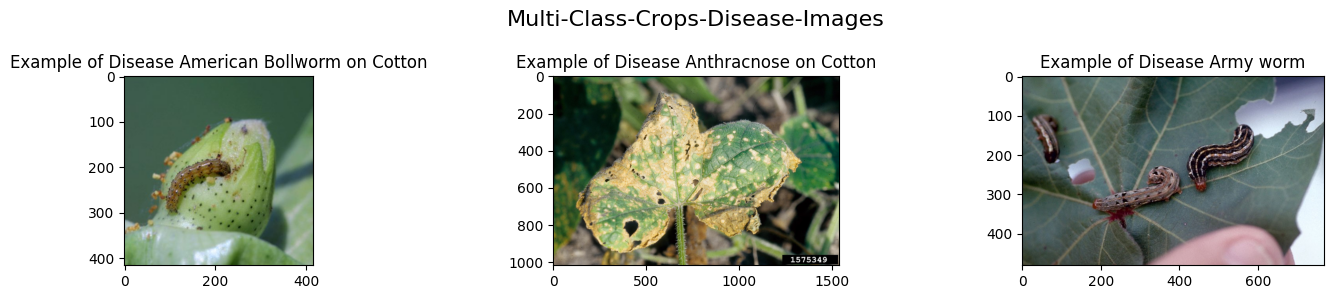

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(14, 3))
fig.suptitle('Multi-Class-Crops-Disease-Images', fontsize=16)

# Plot one image from the first 4 diseases
for i, disease in enumerate(['American Bollworm on Cotton' , 'Anthracnose on Cotton', 'Army worm']):
    dir = os.path.join(TRAINING_DIR, disease)
    img_path = os.path.join(dir, os.listdir(dir)[0])
    img = tf.keras.preprocessing.image.load_img(img_path)
    axes[i].imshow(img)
    axes[i].set_title(f'Example of Disease {disease}')

plt.tight_layout()
plt.show()

checking distribution of images in training and validation set

In [7]:
def show_distribution(DIR_):
    subdirectory_names = []
    image_counts = []
    
    print(f"{os.path.basename(DIR_)} IMAGES:")
    for dirname, _, filenames in os.walk(DIR_):
        if dirname != DIR_:  # Exclude the root directory
            img_count = len(filenames)
            subdirectory_name = os.path.basename(dirname)
            subdirectory_names.append(subdirectory_name)
            image_counts.append(img_count)
            print(f"Total number of images in '{subdirectory_name}' is {img_count}")
    
    # Plotting the data
    plt.figure(figsize=(10, 6))
    plt.bar(subdirectory_names, image_counts, color='skyblue')
    plt.xlabel('Subdirectories', fontsize=14)
    plt.ylabel('Image Count', fontsize=14)
    plt.title('Image Count in Each Subdirectory', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Train IMAGES:
Total number of images in 'American Bollworm on Cotton' is 56
Total number of images in 'Anthracnose on Cotton' is 29
Total number of images in 'Army worm' is 40
Total number of images in 'bacterial_blight in Cotton' is 489
Total number of images in 'Becterial Blight in Rice' is 1584
Total number of images in 'bollrot on Cotton' is 2
Total number of images in 'bollworm on Cotton' is 21
Total number of images in 'Brownspot' is 1640
Total number of images in 'Common_Rust' is 1306
Total number of images in 'Cotton Aphid' is 39
Total number of images in 'cotton mealy bug' is 91
Total number of images in 'cotton whitefly' is 55
Total number of images in 'Flag Smut' is 179
Total number of images in 'Gray_Leaf_Spot' is 574
Total number of images in 'Healthy cotton' is 426
Total number of images in 'Healthy Maize' is 1162
Total number of images in 'Healthy Wheat' is 291
Total number of images in 'Leaf Curl' is 418
Total number of images in 'Leaf smut' is 40
Total number of images

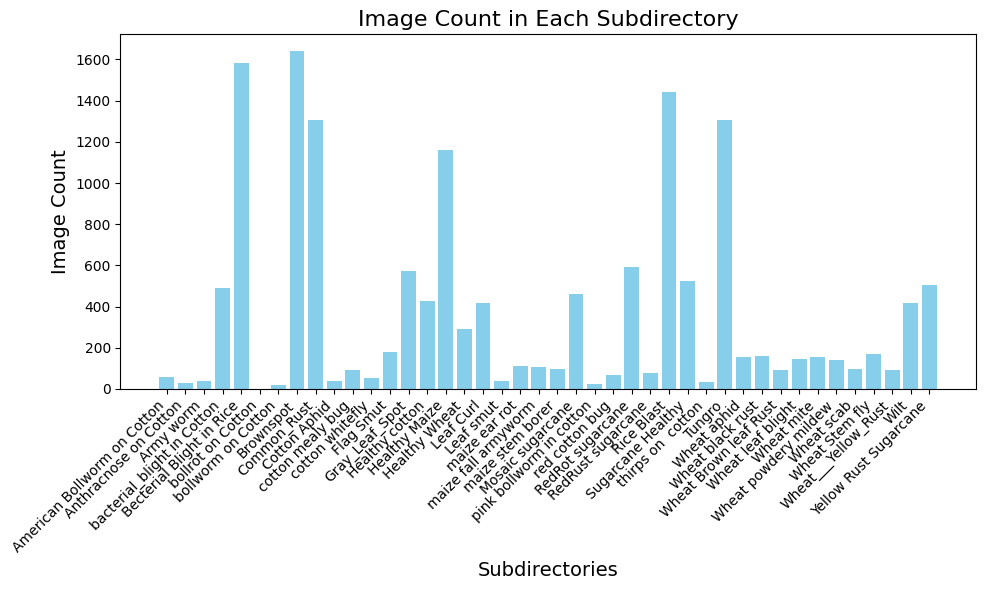

Validation IMAGES:
Total number of images in 'American Bollworm on Cotton' is 30
Total number of images in 'Anthracnose on Cotton' is 10
Total number of images in 'Army worm' is 351
Total number of images in 'Bacterial Blight in cotton' is 284
Total number of images in 'Becterial Blight in Rice' is 22
Total number of images in 'bollrot on Cotton' is 2
Total number of images in 'bollworm on Cotton' is 9
Total number of images in 'Brownspot' is 9
Total number of images in 'Common_Rust' is 18
Total number of images in 'Cotton Aphid' is 287
Total number of images in 'cotton mealy bug' is 58
Total number of images in 'cotton whitefly' is 45
Total number of images in 'Flag Smut' is 24
Total number of images in 'Gray_Leaf_Spot' is 20
Total number of images in 'Healthy cotton' is 176
Total number of images in 'Healthy Maize' is 275
Total number of images in 'Healthy Wheat' is 33
Total number of images in 'Leaf Curl' is 81
Total number of images in 'Leaf smut' is 16
Total number of images in 'm

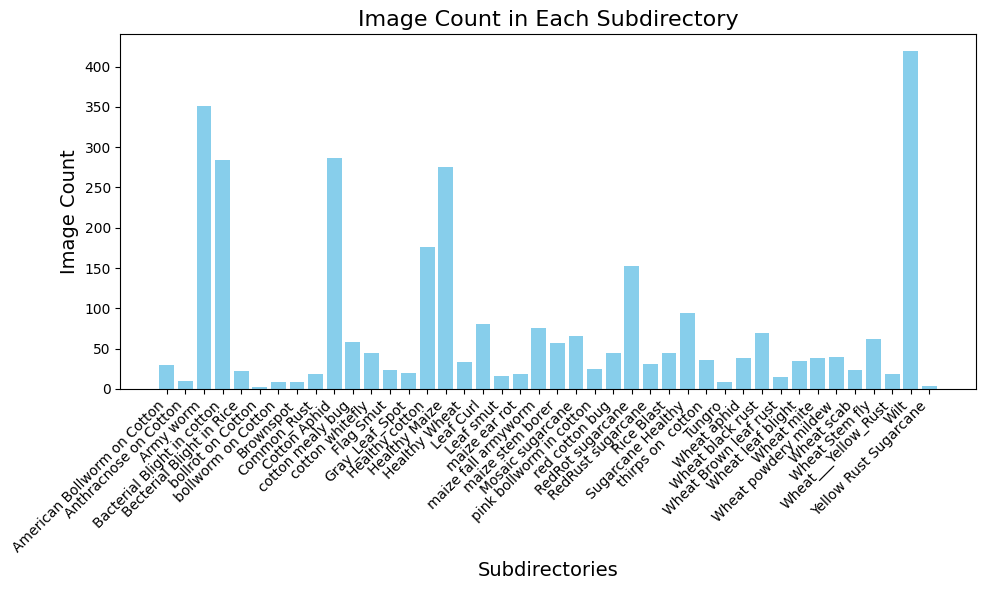

In [8]:
show_distribution(TRAINING_DIR)
show_distribution(VALIDATION_DIR)

count each class images

In [9]:
def count_each_class(root_dir, image_counts, all_class_names):
    for DIRNAME in ROOT_DIR:
        for dirname, _, filenames in os.walk(DIRNAME):
            if dirname != DIRNAME:  # Exclude the root directory
                img_cnt = len(filenames)
                subdirectory_name = os.path.basename(dirname).lower()  # Convert to lowercase
                if subdirectory_name not in all_class_names:
                    all_class_names.append(subdirectory_name)
                    image_counts[subdirectory_name] = img_cnt
                else:
                    image_counts[subdirectory_name] += img_cnt  # Sum counts if directory already exists
    return image_counts

In [10]:
# Get the counts from both directories
image_counts = {}
image_counts = count_each_class(ROOT_DIR, image_counts, [])
for subdir, cnt in image_counts.items():
    print(f"There are {cnt} of {subdir} images")

There are 86 of american bollworm on cotton images
There are 39 of anthracnose on cotton images
There are 391 of army worm images
There are 489 of bacterial_blight in cotton images
There are 1606 of becterial blight in rice images
There are 4 of bollrot on cotton images
There are 30 of bollworm on cotton images
There are 1649 of brownspot images
There are 1324 of common_rust images
There are 326 of cotton aphid images
There are 149 of cotton mealy bug images
There are 100 of cotton whitefly images
There are 203 of flag smut images
There are 594 of gray_leaf_spot images
There are 602 of healthy cotton images
There are 1437 of healthy maize images
There are 324 of healthy wheat images
There are 499 of leaf curl images
There are 56 of leaf smut images
There are 130 of maize ear rot images
There are 184 of maize fall armyworm images
There are 152 of maize stem borer images
There are 528 of mosaic sugarcane images
There are 50 of pink bollworm in cotton images
There are 113 of red cotton bu

Creating datasets for CNN
Train_Val datasets

In [11]:
def train_val_datasets(TRAINING_DIR, VALIDATION_DIR):
    train_dataset = tf.keras.utils.image_dataset_from_directory( 
        directory=TRAINING_DIR,
        batch_size=32,
        image_size=(224,224),
		label_mode='categorical',
        color_mode = "rgb",
    ) 
    
    validation_dataset = tf.keras.utils.image_dataset_from_directory( 
        directory=VALIDATION_DIR,
        batch_size=32,
        image_size=(224,224),
		label_mode='categorical',
        color_mode = "rgb",
    ) 
    return train_dataset, validation_dataset

In [12]:
# Create train and validation datasets
train_dataset, validation_dataset = train_val_datasets(TRAINING_DIR, VALIDATION_DIR)

Found 15413 files belonging to 42 classes.
Found 3164 files belonging to 42 classes.


In [13]:
(images, labels) = list(train_dataset.take(1))[0]
example_batch_images = images
example_batch_labels = labels
print(images.shape)
print(labels.shape)

(32, 224, 224, 3)
(32, 42)


Create Augmentation Layer

In [14]:
augmentation_model = tf.keras.Sequential([ 
	tf.keras.Input(shape=(224,224,3)),
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2, fill_mode = 'nearest'),
    tf.keras.layers.RandomTranslation(0.2, 0.2, fill_mode = 'nearest'),
    tf.keras.layers.RandomZoom(0.2, fill_mode = 'nearest')
]) 

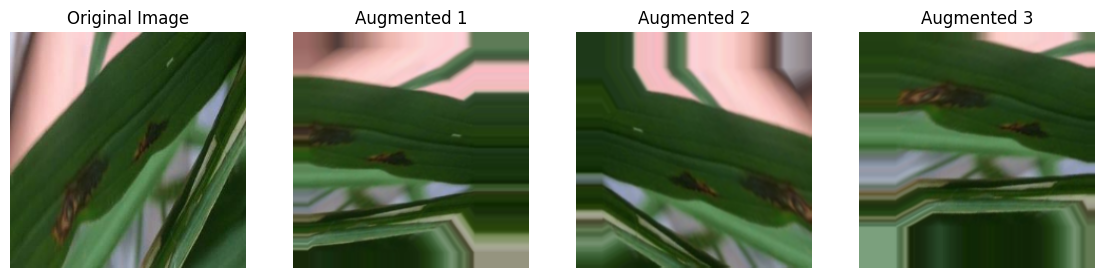

In [15]:
# Load your model for augmentation
data_augmentor = augmentation_model

# Take a sample image
sample_image = tf.keras.utils.array_to_img(example_batch_images[0])

images = [sample_image]

# Apply random augmentation 3 times
for _ in range(3):
	image_aug = data_augmentor(tf.expand_dims(sample_image, axis=0))
	image_aug = tf.keras.utils.array_to_img(tf.squeeze(image_aug))
	images.append(image_aug)


fig, axs = plt.subplots(1, 4, figsize=(14, 7))
for ax, image, title in zip(axs, images, ['Original Image', 'Augmented 1', 'Augmented 2', 'Augmented 3']):
    ax.imshow(image, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.show()

create pre-trained model

In [16]:
pre_trained_model = tf.keras.applications.EfficientNetB0( 
    include_top=False, 
    input_shape=(224,224,3),
    weights=r'C:\Users\Timmothy Farrel\Documents\Berkas Bangkit\Bangkit\Capstone\efficientnetb0_notop.h5'
) 

# Make all the layers in the pre-trained model non-trainable
for layer in pre_trained_model.layers:
    layer.trainable = False

define callback

In [17]:
class EarlyStoppingCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs['accuracy']>0.85:
            self.model.stop_training = True
            print("\nReached 85% accuracy so cancelling training!")

In [18]:
pre_trained_model.summary()

Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer_1[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ normalization[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 112, 112,  │         64 │ block1a_project_

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,049,571 (15.45 MB)

**BUILD FINAL MODEL**

In [19]:
inputs = tf.keras.Input(shape=(224,224,3))
x = data_augmentor(inputs)
x = pre_trained_model(x)
x = tf.keras.layers.GlobalAveragePooling2D() (x)
x = tf.keras.layers.Dense(1024, activation='relu') (x)
x = tf.keras.layers.Dropout(0.2) (x)
x = tf.keras.layers.Dense(42, activation='linear') (x)       

model = tf.keras.Model(inputs= inputs, outputs=x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.0001),
                  loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                  metrics = ['accuracy']
             )


Use the tf.keras.applications.efficientnet.preprocess_input function to preprocess images correctly. This function ensures the images are scaled and normalized as required by EfficientNet.****

In [ ]:
preprocess_input = tf.keras.applications.efficientnet.preprocess_input
def preprocess_dataset(dataset):
    return dataset.map(lambda x, y: (preprocess_input(x), y))

train_dataset = preprocess_dataset(train_dataset)
validation_dataset = preprocess_dataset(validation_dataset)

train_dataset = train_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

: 

In [ ]:
history = model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = 30,
    verbose = 1,
    callbacks = [EarlyStoppingCallback()],
)

Epoch 1/30
441/482 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.5372 - loss: 1.9359